### ต้องดูดาวไหม?
Correlation ระหว่าง SET Index Dow Jones และ s&p500

In [13]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd 
from datetime import datetime as dt
import matplotlib.pyplot as plt 
  
%matplotlib inline
%config InlineBackend.figure_format='retina'

import starfishX as sx
import seaborn as sns

In [2]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [3]:
def getHistPrice(symbol,exchange):
    df = tv.get_hist(symbol=symbol,exchange=exchange,interval=Interval.in_daily,n_bars=500)
    df['Date'] = pd.to_datetime(df.index)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'])

    df = df[['Date','close']]
    df = df.set_index('Date')
    df.columns = [symbol]
    return df

In [16]:
df_set = getHistPrice(symbol='set',exchange='set')
df_set.tail(10)

set
Date                 
2022-01-24  1640.5400
2022-01-25  1639.0900
2022-01-26  1643.4399
2022-01-27  1634.1700
2022-01-28  1639.5100
2022-01-31  1648.8101
2022-02-01  1661.7500
2022-02-02  1667.7500
2022-02-03  1669.0500
2022-02-04  1674.2200

In [5]:
df_dji = getHistPrice(symbol='dji',exchange='dj')
df_dji.tail(5)

dji
Date                
2022-01-31  35131.87
2022-02-01  35405.25
2022-02-02  35629.34
2022-02-03  35111.17
2022-02-04  35002.99

In [6]:
df_sp500 = getHistPrice(symbol='spx',exchange='sp')
df_sp500.tail(5)

spx
Date               
2022-01-31  4515.54
2022-02-01  4546.53
2022-02-02  4589.37
2022-02-03  4477.43
2022-02-04  4482.14

In [7]:
df_set['dji'] = df_dji['dji']
df_set['spx'] = df_sp500['spx']

In [8]:
df = df_set.dropna()

In [9]:
df.rebase(100).plot()

<AxesSubplot:xlabel='Date'>

In [10]:
df.corr()

set       dji       spx
set  1.000000  0.934707  0.920712
dji  0.934707  1.000000  0.990658
spx  0.920712  0.990658  1.000000

<AxesSubplot:>

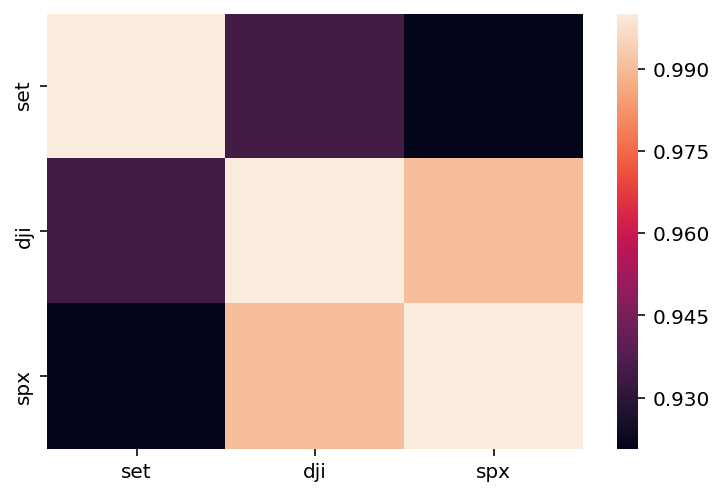

In [11]:
sns.heatmap(df.corr())

In [14]:
df.head(5)

set       dji      spx
Date                                    
2020-02-13  1532.7700  29423.31  3373.94
2020-02-14  1526.3000  29398.08  3380.16
2020-02-18  1513.6801  29232.19  3370.29
2020-02-19  1505.5400  29348.03  3386.15
2020-02-20  1491.2400  29219.98  3373.23

In [15]:
df.tail(5)

set       dji      spx
Date                                    
2022-01-31  1648.8101  35131.87  4515.54
2022-02-01  1661.7500  35405.25  4546.53
2022-02-02  1667.7500  35629.34  4589.37
2022-02-03  1669.0500  35111.17  4477.43
2022-02-04  1674.2200  35002.99  4482.14